# Informações iniciais
__[Dataset utilizado](https://drive.google.com/drive/u/1/folders/1V3v38PR8h28bwYMdB5Q4zLdevnl0sh2y)__

Descrição das features: 
- **id**: ID exclusivo para cada asteroide;
- **name**: nome do asteroide dado pela NASA;
- **est_diameter_min**: diâmetro mínimo estimado em km;
- **est_diameter_max**: diâmetro máximo estimado em km;
- **relative_velocity**: velocidade relativa à Terra;
- **miss_distance**: distância perdida em km;
- **orbiting_body**: planeta que o asteroide orbita;
- **sentry_object**: incluído no sentry - um sistema automatizado de
monitoramento de colisões?;
- **absolute_magnitude**: descreve a luminosidade intrínseca;

Descrição do Target:
- **hazardous**: feature booleana que mostra se o asteroide é prejudicial ou não.

## Setup
Importação das bibliotecas necessárias para análise do dataset a ser estudado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dfAsteroides = pd.read_csv('neo.csv')

## Análise inicial

In [ ]:
dfAsteroides.head(1)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False


In [ ]:
dfAsteroides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


Analisando o obtido, vemos que tanto a coluna **id** quanto **name** têm como função, apenas, auxiliar a identificação de um asteroide, descartaremos **name**. Olhando as demais features, temos que **orbiting_body** e **sentry_object** são dados categóricos, enquanto as demais são dados numéricos.

In [ ]:
dfAsteroides.drop(columns='name', inplace=True)
dfAsteroides.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
dfAsteroides['id'].duplicated().sum()

63413

Verificamos que temos que existem asteroides com mais de uma observação referente a ele, o que verificamos ao termos observações distintas com o mesmo **id** de asteroide. Portanto, vamos analisar tal fato com um pouco mais de profundidade.

In [ ]:
dfAsteroides[dfAsteroides['id'].duplicated()]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
860,54054466,0.282199,0.631015,50527.379563,5.837007e+07,Earth,False,19.87,False
874,2481025,0.211132,0.472106,56617.670821,5.919658e+07,Earth,False,20.50,False
902,3838929,0.010105,0.022596,26993.012322,4.268292e+07,Earth,False,27.10,False
915,3404526,0.096506,0.215794,40616.422354,5.406361e+07,Earth,False,22.20,False
931,3893865,0.044725,0.100009,20141.588595,3.039894e+07,Earth,False,23.87,False
...,...,...,...,...,...,...,...,...,...
90831,3763337,0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
dfAsteroides[dfAsteroides['id'] == 54054466]

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
261,54054466,0.282199,0.631015,49291.863469,6.844426e+07,Earth,False,19.87,False
860,54054466,0.282199,0.631015,50527.379563,5.837007e+07,Earth,False,19.87,False
9936,54054466,0.282199,0.631015,67028.758033,3.233624e+07,Earth,False,19.87,False
19868,54054466,0.282199,0.631015,99878.702803,6.378227e+07,Earth,False,19.87,False
49598,54054466,0.282199,0.631015,90603.384239,4.842004e+07,Earth,False,19.87,False
80990,54054466,0.282199,0.631015,68108.791701,3.006281e+07,Earth,False,19.87,False


Com os dados acima, tomamos como exemplo o asteroide de id 54054466 e, a partir disso, vemos que as diferenças nas observações referentes a um mesmo asteroide estão na velocidade relativa e na distância perdida dele. Também podemos levantar a hipótese que tais features mencionadas não influenciem tanto no target, visto que em todas as observações analisadas o resultado foi igual, mesmo para valores bem distintos dessas features, entretanto, isso será analisado com mais calma posteriormente.

# Análise de dados categóricos

In [ ]:
dfAsteroides.describe(include=['object', 'bool'])

,orbiting_body,sentry_object,hazardous
count,90836,90836,90836
unique,1,1,2
top,Earth,False,False
freq,90836,90836,81996


Vemos que ambas as features possuem apenas um tipo de resposta, assim, podemos concluir que essas não serão relevantes para a predição. Por isso, descartaremos tais colunas da nossa análise.

In [ ]:
dfAsteroides.drop(columns=['orbiting_body', 'sentry_object'], inplace=True)
dfAsteroides.head(1)

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False


In [ ]:
# Trocando o tipo de dado da target de bool para object, a fim de evidenciar que tal dado é categorico e facilitar o que será feito posteriormente
dfAsteroides = dfAsteroides.astype({'hazardous': object}, copy=False)
dfAsteroides['hazardous'].replace(True, 'True', inplace=True)
dfAsteroides['hazardous'].replace(False, 'False', inplace=True)

# Análise dos dados numéricos

In [ ]:
dfAsteroides.describe(include=np.number)

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


Analisando o obtido acima, não vemos nenhuma resposta absurda, portanto, partiremos para a análise individual de cada feature.
## Análise de **est_diameter_min**

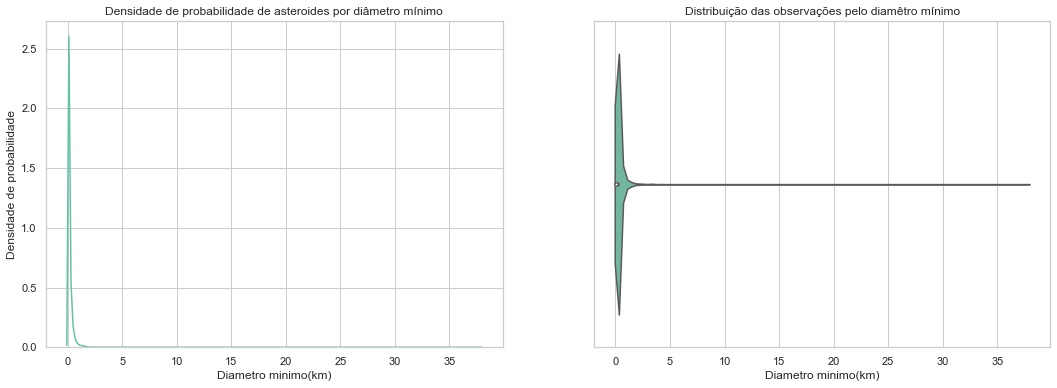

In [ ]:
sns.set_theme(style='whitegrid', palette='Set2')
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.kdeplot(data=dfAsteroides, x='est_diameter_min')
plt.title('Densidade de probabilidade de asteroides por diâmetro mínimo')
plt.ylabel('Densidade de probabilidade')
plt.xlabel('Diametro minimo(km)')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='est_diameter_min')
plt.title('Distribuição das observações pelo diamêtro mínimo')
plt.xlabel('Diametro minimo(km)')
plt.show()

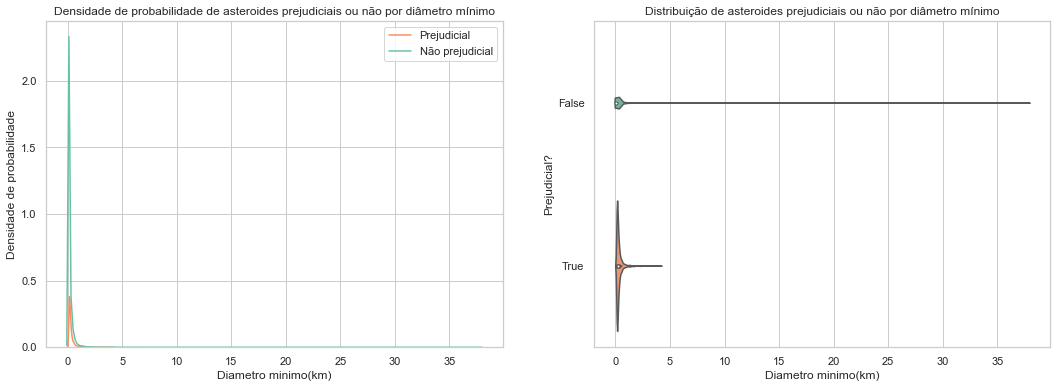

In [ ]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.kdeplot(data=dfAsteroides, x='est_diameter_min', hue='hazardous')
plt.legend(['Prejudicial', 'Não prejudicial'])
plt.title('Densidade de probabilidade de asteroides prejudiciais ou não por diâmetro mínimo')
plt.ylabel('Densidade de probabilidade')
plt.xlabel('Diametro minimo(km)')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='est_diameter_min', y='hazardous')
plt.title('Distribuição de asteroides prejudiciais ou não por diâmetro mínimo')
plt.ylabel('Prejudicial?')
plt.xlabel('Diametro minimo(km)')
plt.show()

Vemos que o diâmetro mínimo das observações é extremamente concentrado no intervalo próximo a 0 km, mas que temos asteroides com diâmetro mínimo indo até pouco mais de 35 km. Já analisando o diâmetro mínimo com relação a target, temos asteroides prejudiciais com diâmetro mínimo até um pouco menos que 5 km, sendo esses concentrados em valores próximos a 0 km, assim como asteroides não prejudiciais também estão, majoritariamente, nesse faixa. Assim, o fato de grande parte dos asteroides prejudiciais têm diâmetro mínimo um pouco maior que 0 km e de não termos asteroides prejudiciais a partir de um certo valor podem indicar que tal feature possui grande influência na target.

## Análise de **est_diameter_max**

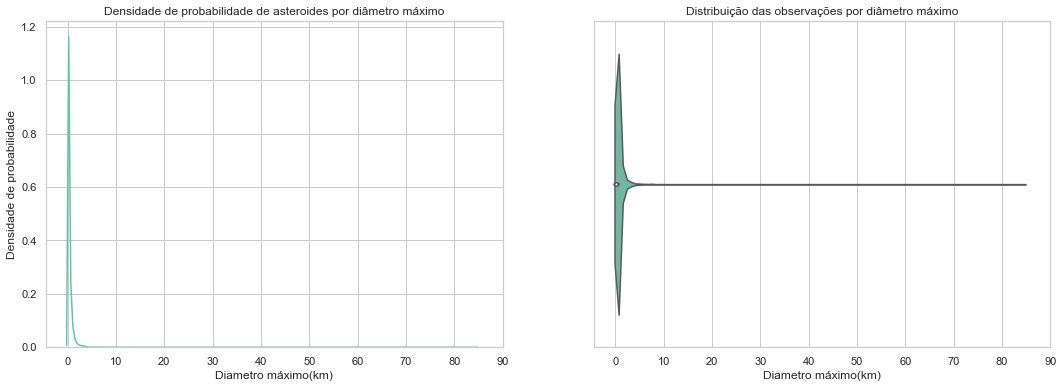

In [ ]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.kdeplot(data=dfAsteroides, x='est_diameter_max')
plt.title('Densidade de probabilidade de asteroides por diâmetro máximo')
plt.ylabel('Densidade de probabilidade')
plt.xlabel('Diametro máximo(km)')
plt.xticks(range(0, 100, 10))

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='est_diameter_max')
plt.title('Distribuição das observações por diâmetro máximo')
plt.xlabel('Diametro máximo(km)')
plt.xticks(range(0, 100, 10))
plt.show()

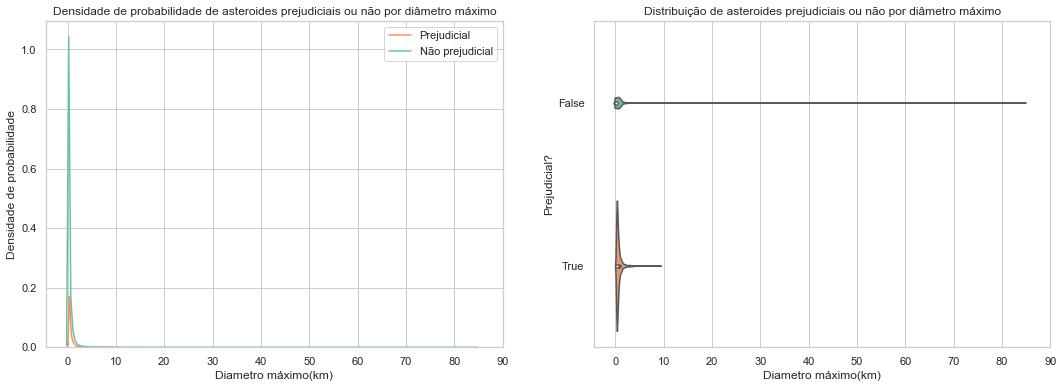

In [ ]:
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.kdeplot(data=dfAsteroides, x='est_diameter_max', hue='hazardous')
plt.legend(['Prejudicial', 'Não prejudicial'])
plt.title('Densidade de probabilidade de asteroides prejudiciais ou não por diâmetro máximo')
plt.ylabel('Densidade de probabilidade')
plt.xlabel('Diametro máximo(km)')
plt.xticks(range(0, 100, 10))

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='est_diameter_max', y='hazardous')
plt.title('Distribuição de asteroides prejudiciais ou não por diâmetro máximo')
plt.ylabel('Prejudicial?')
plt.xlabel('Diametro máximo(km)')
plt.xticks(range(0, 100, 10))
plt.show()

Para o diâmetro máximo observamos um comportamento bem semelhante ao diâmetro mínimo visto acima, em que a grande parte das observações têm diâmetro máximo pouco maior que 0 km, a maior diferença é que temos observações com diâmetro máximo de até pouco mais de 80 km. Quanto a relação da característica com a target, observamos asteroides prejudiciais até 10 km, praticamente, mas, assim como para o diâmetro mínimo, tais asteroides estão concentrados na faixa perto de 0 km. A partir disso, podemos tirar conclusões semelhantes às levantadas para o diâmetro mínimo, ou seja, que tal feature deve ter uma influência considerável na target.

## Análise de **relative_velocity**

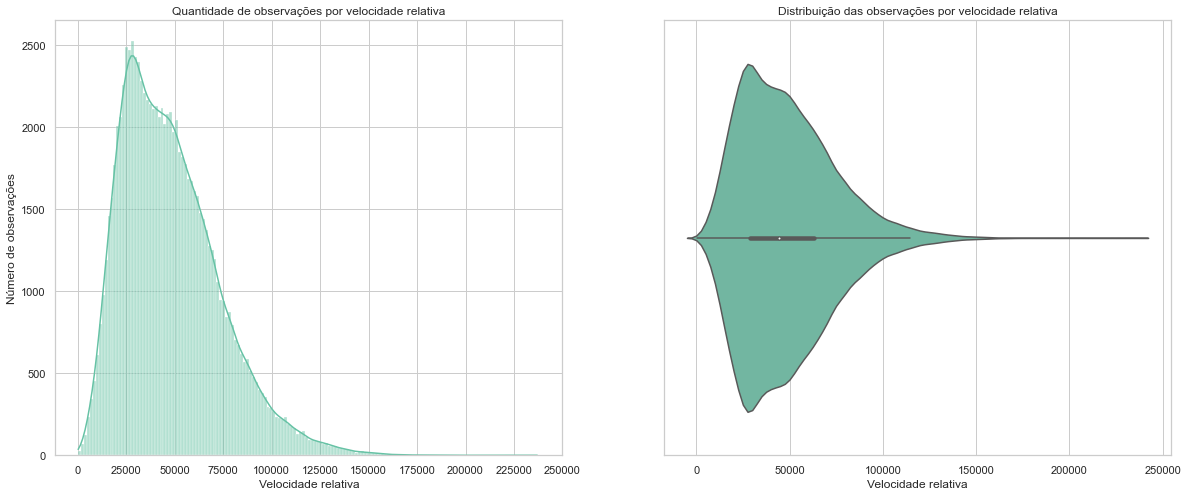

In [ ]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='relative_velocity', kde=True)
plt.title('Quantidade de observações por velocidade relativa')
plt.ylabel('Número de observações')
plt.xlabel('Velocidade relativa')
plt.xticks(range(0, 275000, 25000))

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='relative_velocity')
plt.title('Distribuição das observações por velocidade relativa')
plt.xlabel('Velocidade relativa')
plt.show()

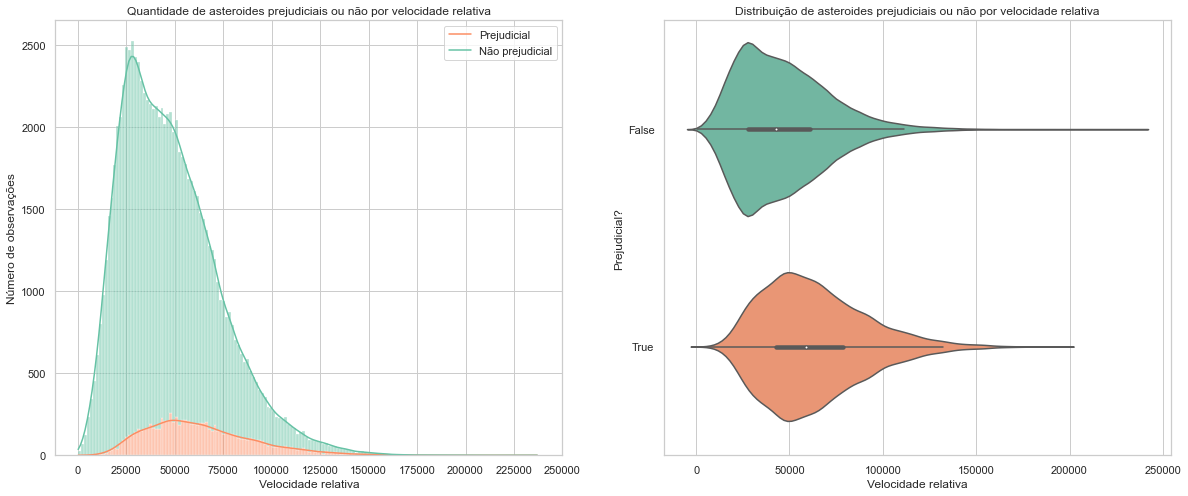

In [ ]:
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='relative_velocity', hue='hazardous', kde=True, multiple='stack')
plt.legend(['Prejudicial', 'Não prejudicial'])
plt.title('Quantidade de asteroides prejudiciais ou não por velocidade relativa')
plt.ylabel('Número de observações')
plt.xlabel('Velocidade relativa')
plt.xticks(range(0, 275000, 25000))

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='relative_velocity', y='hazardous')
plt.title('Distribuição de asteroides prejudiciais ou não por velocidade relativa')
plt.ylabel('Prejudicial?')
plt.xlabel('Velocidade relativa')
plt.show()

Observamos que a maior parte das observações têm velocidade relativa de até 12500, aproximadamente, sendo que de 0 até 2500 o número de observações cresce, e, a partir daí, começa a decair. Já com relação a target, temos um comportamento bem semelhante para asteroides prejudiciais e não prejudiciais, que, por sua vez, é parecido com o descrito acima, a principal diferença, entretanto, encontra-se no fato de que a quantidade de asteroides prejudiciais tem seu pico para uma velocidade relativa de 5000, enquanto os não prejudiciais em torno de 2500. Concluímos, então, que a velocidade relativa tem uma influência razoável na prejudicialidade de um asteroide.

## Análise de **miss_distance**

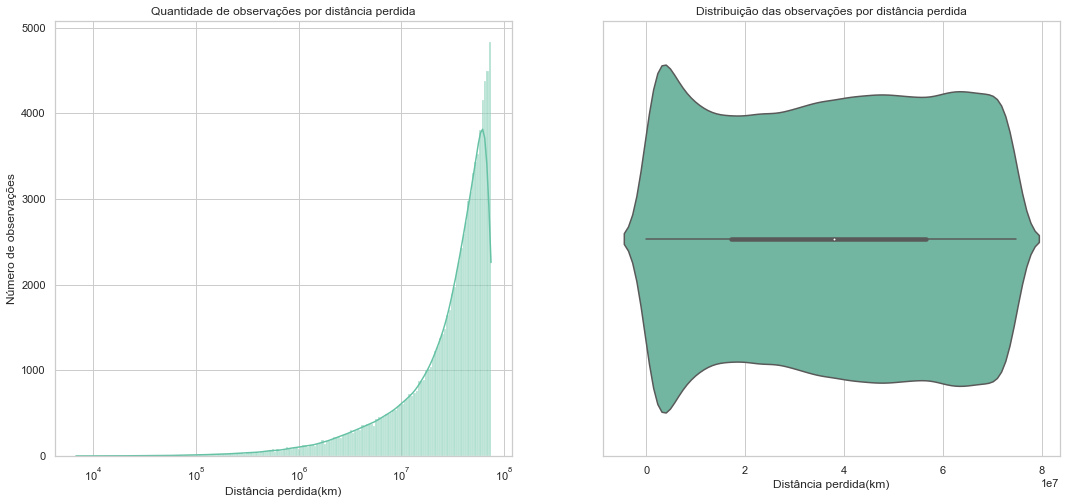

In [ ]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='miss_distance', kde=True, log_scale=True)
plt.title('Quantidade de observações por distância perdida')
plt.ylabel('Número de observações')
plt.xlabel('Distância perdida(km)')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='miss_distance')
plt.title('Distribuição das observações por distância perdida')
plt.xlabel('Distância perdida(km)')
plt.show()

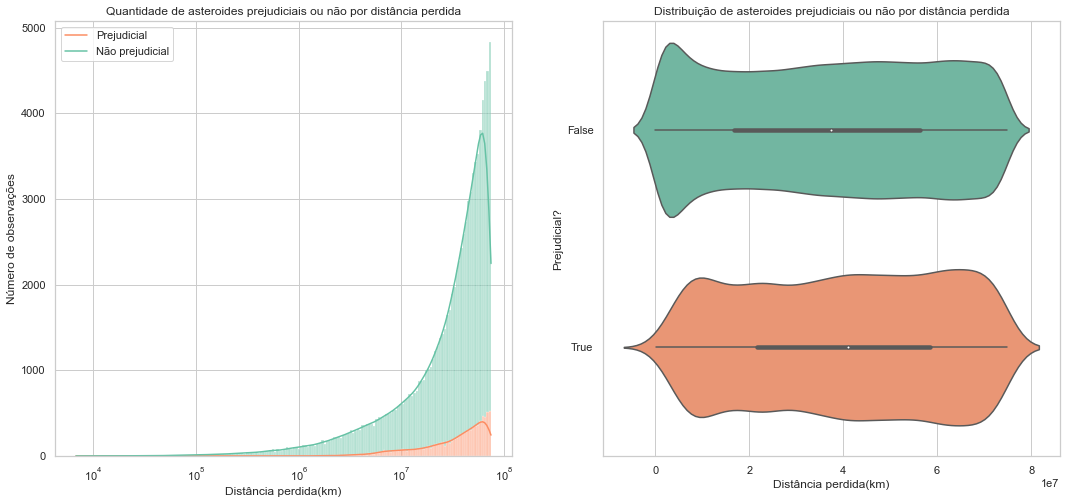

In [ ]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='miss_distance', hue='hazardous', kde=True, multiple='stack', log_scale=True)
plt.legend(['Prejudicial', 'Não prejudicial'])
plt.title('Quantidade de asteroides prejudiciais ou não por distância perdida')
plt.ylabel('Número de observações')
plt.xlabel('Distância perdida(km)')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='miss_distance', y='hazardous')
plt.title('Distribuição de asteroides prejudiciais ou não por distância perdida')
plt.ylabel('Prejudicial?')
plt.xlabel('Distância perdida(km)')
plt.show()

Observamos que as observações, quanto à distância perdida, são mais presentes na ordem dos 10 milhões, sendo que em tal ordem de grandeza, vemos que a quantidade de observações é bem distribuída, variando de muito pouco de 10 milhões até os 80 milhões km. Analisando a distância perdida, com relação à prejudicialidade dos asteroides, vemos que o número de asteroides prejudiciais passa a ser relavantes quando temos distâncias perdidas maiores do que 10 milhões de km, e que, a partir desse ponto, a quantidade de asteroides desse tipo é bem constante, de 10 até 80 milhões de km. Portanto, a distância perdida aparenta ter uma influência razoável na prejudicialidade de um asteroide.

## Análise de **absolute_magnitude**

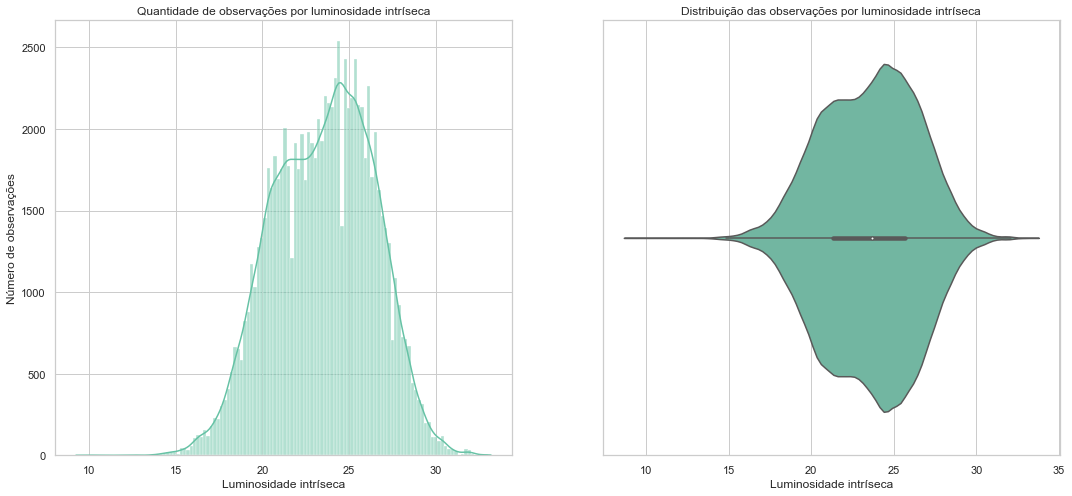

In [ ]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='absolute_magnitude', kde=True)
plt.title('Quantidade de observações por luminosidade intríseca')
plt.ylabel('Número de observações')
plt.xlabel('Luminosidade intríseca')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='absolute_magnitude')
plt.title('Distribuição das observações por luminosidade intríseca')
plt.xlabel('Luminosidade intríseca')
plt.show()

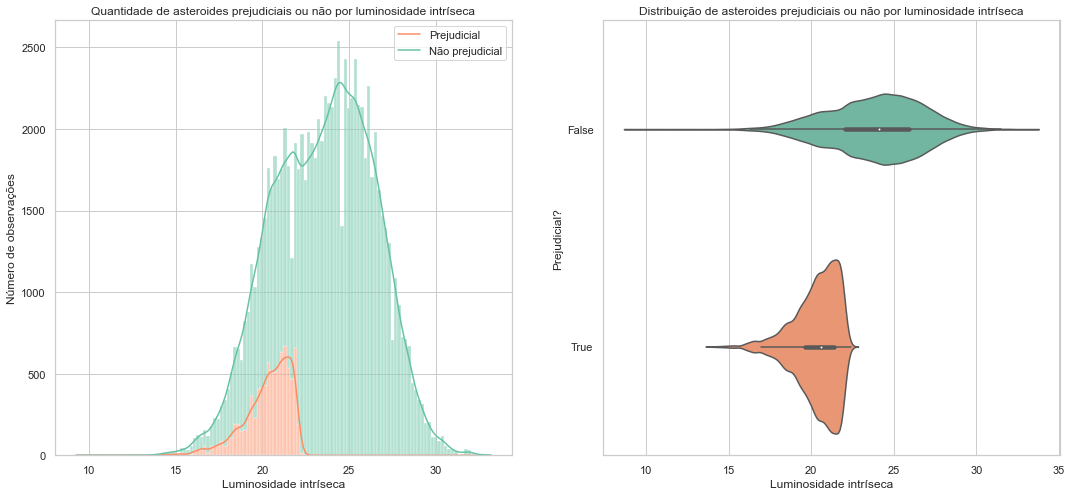

In [ ]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.histplot(data=dfAsteroides, x='absolute_magnitude', hue='hazardous',kde=True, multiple='stack')
plt.legend(['Prejudicial', 'Não prejudicial'])
plt.title('Quantidade de asteroides prejudiciais ou não por luminosidade intríseca')
plt.ylabel('Número de observações')
plt.xlabel('Luminosidade intríseca')

plt.subplot(1,2,2)
sns.violinplot(data=dfAsteroides, x='absolute_magnitude', y='hazardous')
plt.title('Distribuição de asteroides prejudiciais ou não por luminosidade intríseca')
plt.ylabel('Prejudicial?')
plt.xlabel('Luminosidade intríseca')
plt.show()

Analisando as informações, concluímos que a luminosidade das observações concentra-se, principalmente, entre 18 e 28, aproximadamente. Já observando tal característica, distinguindo as observações em asteroides prejudiciais ou não, vemos que as observações classificadas como prejudiciais são observadas, praticamente, até uma luminosidade perto de 22, após tal valor quase não temos asteroides prejudicias. Assim, tal constatação pode indicar que a luminosidade influencie consideravelmente na prejudicialidade de um asteroide.

# Conclusão sobre os dados contínuos e análise sobre influência das features na target

Com o visto acima, esperamos que as features **est_diameter_min**, **est_diameter_max** e **absolute_magnitude** estejam consideravelmente relacionadas à prejudicialidade dos asteroides, enquanto as demais aparentam possuir uma influência um pouco menor com a target.

Para analisar mais precisamente a influência que as features têm na target, usaremos algumas técnicas para ver a importância das features para a predição da target, *Feature Importance*. Nesse caso, faremos, primeiramente, uma Regressão Logística para o nosso dataset, a partir dela, encontraremos os coeficientes atribuídos para cada feature, em que quanto maior o coeficiente, mais importante tal feature seria. Posteriormente, faríamos algo parecido, sendo que para árvores de decisão, e através da propriedade `feature_importances_` acharíamos a importância de cada feature. Feito isso, compararíamos os resultados achados a fim de entender melhor como cada feature influencia, de fato, para a predição. Para ambos os casos, como trata-se de um dataset desbalanceado, atribuirémos pesos diferentes às classes da target, aquela em menor frequência com maior peso, isso é feito pelo parâmetro `class_weight`.

In [ ]:
# Colocando os dados numéricos em mesma escala e colocando o id como index do dataset
from sklearn.model_selection import train_test_split
dfAsteroides.set_index('id', inplace=True)
dfAsteroides = pd.get_dummies(dfAsteroides)
dfAsteroides['hazardous'] = dfAsteroides['hazardous_True']
dfAsteroides.drop(columns=['hazardous_False', 'hazardous_True'], inplace=True)
x = dfAsteroides.drop(columns='hazardous')
y = dfAsteroides['hazardous']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
processor = MinMaxScaler()
x_train = processor.fit_transform(x_train)
x_test = processor.transform(x_test)

c:\Users\caste\anaconda3\envs\teste\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.linear_model import LogisticRegression
regLog = LogisticRegression(class_weight='balanced')
regLog.fit(x_train, y_train)
for i in range(5):
    print(f'Coeficiente de {dfAsteroides.columns[i]}: {regLog.coef_[0][i]:.5f}')


Coeficiente de est_diameter_min: -20.82280
Coeficiente de est_diameter_max: -20.82280
Coeficiente de relative_velocity: 2.30639
Coeficiente de miss_distance: -1.03734
Coeficiente de absolute_magnitude: -20.85871


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Os resultados com o feature_importances_ variam dada a natureza do algoritmo, por isso, para cada árvore, pegaremos a média de 3 ensaios
resultados = [0]*5
for _ in range(3):
    decTreeGini = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
    decTreeGini.fit(x_train, y_train)
    resultados += decTreeGini.feature_importances_
print('Resultados para critério de Gini:')
for i in range(5):
    print(f'Importância de {dfAsteroides.columns[i]}: {resultados[i]/3:.5f}')

resultados = [0]*5
for _ in range(3):
    decTreeEntropy = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
    decTreeEntropy.fit(x_train, y_train)
    resultados += decTreeGini.feature_importances_
print('\nResultados para critério da entropia:')
for i in range(5):
    print(f'Importância de {dfAsteroides.columns[i]}: {resultados[i]/3:.5f}')


Resultados para critério de Gini:
Importância de est_diameter_min: 0.02484
Importância de est_diameter_max: 0.02465
Importância de relative_velocity: 0.16423
Importância de miss_distance: 0.14799
Importância de absolute_magnitude: 0.63831

Resultados para critério da entropia:
Importância de est_diameter_min: 0.02295
Importância de est_diameter_max: 0.02567
Importância de relative_velocity: 0.16425
Importância de miss_distance: 0.14822
Importância de absolute_magnitude: 0.63891


Fazendo a análise dos coeficientes da regressão logística, vemos que **est_diameter_min**, **est_diameter_max** e **absolute_magnitude** tiveram, em módulo, valores bem mais elevados do que **relative_velocity** e **miss_distance**, ou seja, essas foram consideradas bem mais importantes. Outra observação, é que o sinal negativo e positivo serve para distinguir qual resposta a feature prediz, assim, conforme as análises individuais de cada feature, podemos concluir que o sinal negativo representa a predição para asteroides prejudiciais e o positivo para aqueles não prejudiciais. Já para a análise das árvores de decisão, vemos que **absolute_magnitude** foi, de longe, a com maior importância, seguida por **relative_velocity** e **miss_distance**, enquanto as outras foram, praticamente, irrelevantes. Portanto, como as análises feitas trouxeram resultados distintos, com exceção de **absolute_magnitude** que se mostrou a feature mais relevante, e temos poucas features no dataset, prosseguiremos sem descartar nenhuma feature.

# Rede Neural

Agora, faremos uma rede neural, usando o Keras, para prever se um asteroide é prejudicial ou não. Para a construção da rede, iremos tunar alguns hiperparâmetros da rede, nesse caso, o número de camadas, a quantidade de neurônios por camada e a taxa de aprendizagem. Nesse caso, os falsos positivos, ou seja, asteroides prejudiciais classificados como não prejudiciais, são extremamente importantes, assim, a sensitividade será a principal métrica considerada na análise, visando aumentá-la o máximo possível, a acurácia será a outra métrica levada em conta na análise. Tunaremos os hiperparâmetros com a função `KerasClassifier`, que 'torna' a rede neural em um estimator, o que permite com que otimizemos seus parâmetros com `RandomizedSearchCV`.

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD 
from keras.metrics import Recall

def networkCreation(learning_rate=0.01 ,nHiddenLayers=0, nNeurons=16):
    optimizer = SGD(learning_rate=learning_rate)
    model = Sequential()
    model.add(Dense(nNeurons, input_shape=(5,), activation='relu'))
    for _ in range(nHiddenLayers):
        model.add(Dense(nNeurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Recall()])
    return model

In [ ]:
class_weights = dict(len(y_train)/y_train.value_counts())

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=networkCreation)

params = dict(nHiddenLayers=[4, 5, 6], nNeurons=[16, 32, 64], learning_rate=[0.1, 0.01, 0.001], epochs=[10], class_weight=[class_weights])
search = RandomizedSearchCV(model, param_distributions=params, cv=3)

search.fit(x_train, y_train)


Epoch 1/10
1514/1514 [==============================] - 4s 2ms/step - loss: 1.0462 - accuracy: 0.6290 - recall_30: 0.8534
Epoch 2/10
1514/1514 [==============================] - 3s 2ms/step - loss: 0.8992 - accuracy: 0.6715 - recall_30: 0.8827
Epoch 3/10
1514/1514 [==============================] - 3s 2ms/step - loss: 0.9344 - accuracy: 0.6271 - recall_30: 0.8746
Epoch 4/10
1514/1514 [==============================] - 3s 2ms/step - loss: 0.7617 - accuracy: 0.7201 - recall_30: 0.9679
Epoch 5/10
1514/1514 [==============================] - 3s 2ms/step - loss: 0.7142 - accuracy: 0.7412 - recall_30: 0.9743
Epoch 6/10
1514/1514 [==============================] - 4s 2ms/step - loss: 0.7130 - accuracy: 0.7330 - recall_30: 0.9802
Epoch 7/10
1514/1514 [==============================] - 4s 3ms/step - loss: 0.7051 - accuracy: 0.7376 - recall_30: 0.9809
Epoch 8/10
1514/1514 [==============================] - 3s 2ms/step - loss: 0.6788 - accuracy: 0.7478 - recall_30: 0.9830
Epoch 9/10
1514/1514 [==

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000278479F3730>,
                   param_distributions={'class_weight': [{0: 1.1078114519178,
                                                          1: 10.275452488687783}],
                                        'epochs': [10],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'nHiddenLayers': [4, 5, 6],
                                        'nNeurons': [16, 32, 64]})

Para as diversas redes criadas e testadas, atingiu-se uma sensitividade boa, assim, usamos a acurácia como critério de escolha.

In [ ]:
print(f'Melhores parâmetros encontrados para a rede: {search.best_params_}')
print(f'Resultados com os melhores parâmetros(Acurácia): {search.best_score_:.3f}')

Melhores parâmetros encontrados para a rede: {'nNeurons': 64, 'nHiddenLayers': 5, 'learning_rate': 0.1, 'epochs': 10, 'class_weight': {0: 1.1078114519178, 1: 10.275452488687783}}
Resultados com os melhores parâmetros(Acurácia): 0.784


Agora que encontramos os melhores hiperparâmetros desejados, construiremos a rede neural com tais parâmetros.

In [ ]:
optModel = networkCreation(learning_rate=0.1, nHiddenLayers=5, nNeurons=64)
optModel.fit(x_train, y_train, epochs=10, class_weight=class_weights)

Epoch 1/10
2271/2271 [==============================] - 5s 2ms/step - loss: 1.0946 - accuracy: 0.6071 - recall_65: 0.8177
Epoch 2/10
2271/2271 [==============================] - 4s 2ms/step - loss: 0.8259 - accuracy: 0.6774 - recall_65: 0.9699
Epoch 3/10
2271/2271 [==============================] - 4s 2ms/step - loss: 0.7423 - accuracy: 0.7261 - recall_65: 0.9764
Epoch 4/10
2271/2271 [==============================] - 5s 2ms/step - loss: 0.7166 - accuracy: 0.7389 - recall_65: 0.9796
Epoch 5/10
2271/2271 [==============================] - 5s 2ms/step - loss: 0.7017 - accuracy: 0.7473 - recall_65: 0.9813
Epoch 6/10
2271/2271 [==============================] - 5s 2ms/step - loss: 0.7108 - accuracy: 0.7428 - recall_65: 0.9808
Epoch 7/10
2271/2271 [==============================] - 5s 2ms/step - loss: 0.6944 - accuracy: 0.7527 - recall_65: 0.9813
Epoch 8/10
2271/2271 [==============================] - 5s 2ms/step - loss: 0.6868 - accuracy: 0.7551 - recall_65: 0.9811
Epoch 9/10
2271/2271 [==

In [ ]:
optModel.evaluate(x_test, y_test)

568/568 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.7468 - recall_65: 0.9994


[0.42089414596557617, 0.7468075752258301, 0.9994344115257263]

Como vemos acima, o desempenho do nosso modelo foi semelhante ao observado no treino, tendo, ainda, uma melhor sensitividade e menor perda, com uma pequena queda na acurácia. Assim, concluímos que o modelo não overfitou e é adequado para o proposto.